In [1]:
# dreamlike-art/dreamlike-anime-1.0
# dreamlike-art/dreamlike-photoreal-2.0
# stabilityai/stable-diffusion-xl-base-1.0

In [2]:
# import torch
# print("CUDA available:", torch.cuda.is_available())
# print("Available GPUs:", torch.cuda.device_count())
# print("Current CUDA device:", torch.cuda.current_device() if torch.cuda.is_available() else "None")

In [3]:
# pip install torch torchvision transformers diffusers datasets accelerate sentence-transformers opencv-python matplotlib

In [4]:
import torch
import torch.nn as nn
from transformers import CLIPTokenizer, CLIPTextModel, CLIPModel, pipeline
from diffusers import StableDiffusionPipeline, StableDiffusionUpscalePipeline
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from diffusers import StableDiffusionXLPipeline

# # ✅ Load High-Quality Stable Diffusion Model
# model_id = "stabilityai/stable-diffusion-xl-base-1.0" 
# pipe = StableDiffusionXLPipeline.from_pretrained(
#     model_id,  
#     torch_dtype=torch.float16,  
#     cache_dir="/kaggle/temp"  
# ).to("cuda")

model_id = "dreamlike-art/dreamlike-anime-1.0" 
 
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,  torch_dtype=torch.float16,
    cache_dir="/kaggle/temp"  
).to("cuda")

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

safety_checker = pipeline("text-classification", model="unitary/unbiased-toxic-roberta")

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
def generate_unbiased_prompt(prompt):

    people_keywords = {"man", "woman", "boy", "girl", "person", "people", "crowd", "group", "family", "faces"}
    object_keywords = {"car", "building", "house", "tree", "mountain", "robot", "animal", "cat", "dog"}
    abstract_keywords = {"dream", "fantasy", "mystical", "surreal", "abstract", "artistic"}

    words = set(prompt.lower().split())

    if words & people_keywords:
        templates = [
            f"A diverse and inclusive representation of {prompt}",
            f"People from different backgrounds engaged in {prompt}",
            f"A culturally rich and unbiased depiction of {prompt}",
            f"A fair and equal portrayal of {prompt}",
        ]
    elif words & object_keywords:
        templates = [
            f"A well-balanced and artistic composition of {prompt}",
            f"A detailed and inclusive perspective on {prompt}",
            f"A creative and unique portrayal of {prompt}",
        ]
    elif words & abstract_keywords:
        templates = [
            f"A thought-provoking and unbiased visualization of {prompt}",
            f"A surreal and inclusive artistic depiction of {prompt}",
        ]
    else:
        return prompt

    template_embeddings = sentence_model.encode(templates, convert_to_tensor=True)
    prompt_embedding = sentence_model.encode(prompt, convert_to_tensor=True)

    if len(template_embeddings.shape) == 1:
        template_embeddings = template_embeddings.unsqueeze(0)
    if len(prompt_embedding.shape) == 1:
        prompt_embedding = prompt_embedding.unsqueeze(0)

    similarities = torch.nn.functional.cosine_similarity(prompt_embedding, template_embeddings)

    if similarities.numel() == 0:
        print("Similarities tensor is empty. Using original prompt.")
        return prompt

    best_index = torch.argmax(similarities).item()

    if best_index >= len(templates): 
        return prompt  

    return templates[best_index]

In [6]:
def is_prompt_safe(prompt):
    result = safety_checker(prompt)[0]
    return result["label"] != "toxic"

def extract_image_features(image):
    transform = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = clip_model.get_image_features(image_tensor)
    return image_features

In [7]:
class ContextAwareConditioning(nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = clip_tokenizer
        self.text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

    def forward(self, texts):
        inputs = self.tokenizer(texts, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            text_embeddings = self.text_encoder(**inputs).last_hidden_state
        return text_embeddings.mean(dim=1)  # Extract semantic meaning

context_encoder = ContextAwareConditioning().to(device)

# ✅ Bias Detection Module
class BiasDetectionModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.bias_classifier = nn.Linear(512, 2).to(device) 

    def forward(self, image_features):
        return self.bias_classifier(image_features)

bias_detector = BiasDetectionModule().to(device)

class ContrastiveFineTuning(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.positive_projection = nn.Linear(embedding_dim, embedding_dim).to(device)
        self.negative_projection = nn.Linear(embedding_dim, embedding_dim).to(device)
        self.loss_fn = nn.CosineEmbeddingLoss()  # Contrastive loss

    def forward(self, biased_embedding, unbiased_embedding):
        positive_proj = self.positive_projection(biased_embedding)
        negative_proj = self.negative_projection(unbiased_embedding)

        # Label for contrastive loss: 1 = similar, -1 = different
        target_label = torch.tensor([1], dtype=torch.float).to(device)

        loss = self.loss_fn(positive_proj, negative_proj, target_label)
        return loss

contrastive_fine_tuner = ContrastiveFineTuning().to(device)

In [8]:
import random

def generate_image(prompt):
    if not is_prompt_safe(prompt):
        print("❌ Unsafe prompt detected! Skipping...")
        return None

    print("Generating Image...")

    seed = random.randint(0, 99999) 
    generator = torch.manual_seed(seed)
    print(f"🎲 Using Seed: {seed}")  

    print(" Encoding text with CLIP for context...")
    contextual_embedding = context_encoder([prompt]).to(device)  

    print(" Generating image with Stable Diffusion using contextual embeddings...")
    image = pipe(prompt, generator=generator, text_embeddings=contextual_embedding).images[0]

    print(" Extracting image features using CLIP...")
    image_features = extract_image_features(image)
    print(f"📊 Image feature vector shape: {image_features.shape}")

    print(" Running bias detection...")
    bias_score = bias_detector(image_features)
    print(f"📊 Bias score (raw): {bias_score.tolist()}")
    
    is_biased = torch.argmax(bias_score).item() == 1
    print(f"✅ Bias detected: {is_biased}")

    if is_biased:
        print(" Potential bias detected. Adjusting...")

        unbiased_prompt = generate_unbiased_prompt(prompt)
        original_embedding = contextual_embedding  
        unbiased_embedding = context_encoder([unbiased_prompt]).to(device)

        blend_factor = 0.7 
        blended_embedding = blend_factor * original_embedding + (1 - blend_factor) * unbiased_embedding

        optimizer = torch.optim.Adam(contrastive_fine_tuner.parameters(), lr=5e-6)  
        for epoch in range(5):
            optimizer.zero_grad()
            loss = contrastive_fine_tuner(image_features, blended_embedding)
            loss.backward()
            optimizer.step()
            print(f"✅ Epoch {epoch+1}/5: Loss = {loss.item():.4f}")

    else:
        print(" No bias detected. Skipping fine-tuning.")

    return image

Generating Image...
🎲 Using Seed: 62181
 Encoding text with CLIP for context...
 Generating image with Stable Diffusion using contextual embeddings...


  0%|          | 0/50 [00:00<?, ?it/s]

 Extracting image features using CLIP...
📊 Image feature vector shape: torch.Size([1, 512])
 Running bias detection...
📊 Bias score (raw): [[-0.18797318637371063, 0.12120954692363739]]
✅ Bias detected: True
 Potential bias detected. Adjusting...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Epoch 1/5: Loss = 1.0244
✅ Epoch 2/5: Loss = 1.0198
✅ Epoch 3/5: Loss = 1.0151
✅ Epoch 4/5: Loss = 1.0104
✅ Epoch 5/5: Loss = 1.0058


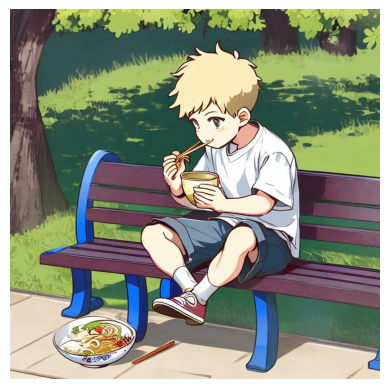

In [9]:
image = generate_image("A boy sitting on a bench and eating Ramen from a bowl")

plt.imshow(image)
plt.axis("off")
plt.show()

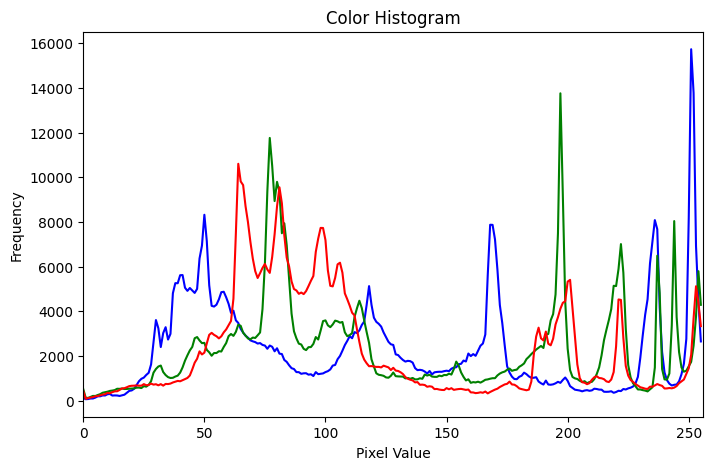

In [10]:
import cv2
import numpy as np

def plot_color_histogram(image):
    image = np.array(image)
    channels = ('b', 'g', 'r')  
    plt.figure(figsize=(8,5))
    
    for i, col in enumerate(channels):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    
    plt.title("Color Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

plot_color_histogram(image)

In [11]:
import torch.nn.functional as F

def compute_clip_score(image, prompt):
    text_inputs = clip_tokenizer(prompt, return_tensors="pt").to(device)
    
    with torch.no_grad():
        text_features = clip_model.get_text_features(**text_inputs).float()
    
    image_features = extract_image_features(image).float()

    text_features = F.normalize(text_features, p=2, dim=-1)
    image_features = F.normalize(image_features, p=2, dim=-1)

    clip_score = torch.mm(text_features, image_features.T).squeeze().item()  # Use matrix multiplication

    return clip_score

Generating Image...
🎲 Using Seed: 59706
 Encoding text with CLIP for context...
 Generating image with Stable Diffusion using contextual embeddings...


  0%|          | 0/50 [00:00<?, ?it/s]

 Extracting image features using CLIP...
📊 Image feature vector shape: torch.Size([1, 512])
 Running bias detection...
📊 Bias score (raw): [[-0.07197265326976776, 0.17425797879695892]]
✅ Bias detected: True
 Potential bias detected. Adjusting...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Epoch 1/5: Loss = 0.9841
✅ Epoch 2/5: Loss = 0.9794
✅ Epoch 3/5: Loss = 0.9747
✅ Epoch 4/5: Loss = 0.9700
✅ Epoch 5/5: Loss = 0.9653
📊 CLIP Score: 0.3659


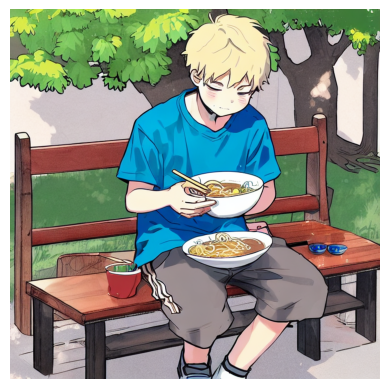

In [12]:
image = generate_image("A boy sitting on a bench and eating Ramen from a bowl") 
clip_score = compute_clip_score(image, "A boy sitting on a bench and eating Ramen from a bowl")  
print(f"📊 CLIP Score: {clip_score:.4f}")  
plt.imshow(image)
plt.axis("off")
plt.show()

Generating Image...
🎲 Using Seed: 74478
 Encoding text with CLIP for context...
 Generating image with Stable Diffusion using contextual embeddings...


  0%|          | 0/50 [00:00<?, ?it/s]

 Extracting image features using CLIP...
📊 Image feature vector shape: torch.Size([1, 512])
 Running bias detection...
📊 Bias score (raw): [[0.292662113904953, 0.049882013350725174]]
✅ Bias detected: False
 No bias detected. Skipping fine-tuning.
✅ Epoch 1/5: Loss = 0.9749
✅ Epoch 2/5: Loss = 0.9700
✅ Epoch 3/5: Loss = 0.9651
✅ Epoch 4/5: Loss = 0.9602
✅ Epoch 5/5: Loss = 0.9553


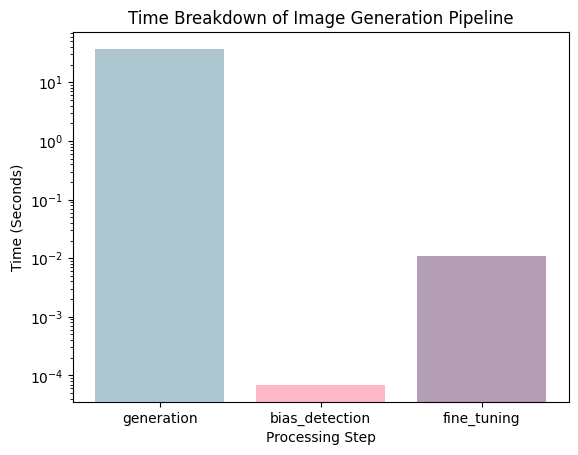

In [13]:
import time

def measure_time(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return result, end - start

times = {}

image, times["generation"] = measure_time(generate_image, "cheetah running in water")

image_features = extract_image_features(image) 
bias_score, times["bias_detection"] = measure_time(bias_detector, image_features)

biased_embedding = image_features

unbiased_prompt = generate_unbiased_prompt("cheetah running in water")  
unbiased_embedding = context_encoder([unbiased_prompt]).to(device)

def fine_tune():
    optimizer = torch.optim.Adam(contrastive_fine_tuner.parameters(), lr=5e-6)
    for epoch in range(5):
        optimizer.zero_grad()
        loss = contrastive_fine_tuner(biased_embedding, unbiased_embedding)
        loss.backward()
        optimizer.step()
        print(f"✅ Epoch {epoch+1}/5: Loss = {loss.item():.4f}")

_, times["fine_tuning"] = measure_time(fine_tune)  

# ✅ Plot time breakdown
plt.bar(times.keys(), times.values(), color=['#AEC6CF', '#FFB7C5', '#B39EB5']  )
plt.xlabel("Processing Step")
plt.ylabel("Time (Seconds)")
plt.title("Time Breakdown of Image Generation Pipeline")
plt.yscale("log")  
plt.show()


# ✅ Simple Objects and Scenes
    "A red apple on a wooden table",  
    "A sunflower in a glass vase",  
    "A white cat sitting on a windowsill",  

# ✅ Complex Scenes and Interactions
    "A person walking a dog in the park during sunset",  
    "A crowded marketplace with people shopping and vendors selling goods",  
    "A group of friends sitting around a campfire under the night sky",  

# ✅ Artistic and Style-based Prompts
    "A portrait of a woman in the style of Van Gogh",  
    "A watercolor painting of a mountain range at sunrise",  
    "A cyberpunk cityscape with neon lights and flying cars, in anime style",  

# ✅ Abstract and Conceptual Prompts
    "The feeling of loneliness represented as a visual scene",  
    "An abstract painting symbolizing the passage of time",  
    "A dream-like vision of floating islands in the sky",  

# ✅ Cultural and Geographical Prompts
    "A Japanese temple surrounded by cherry blossoms in spring",  
    "A Maasai warrior standing in the African savannah at sunset",  
    "A street in Paris with the Eiffel Tower in the background",  

# ✅ Scientific and Technical Prompts
    "A schematic diagram of a quantum computer",  
    "A realistic illustration of a DNA double helix",  
    "An astronaut floating outside the International Space Station",  

# ✅ Emotion and Mood-based Prompts
    "A person sitting alone on a rainy day, feeling melancholic",  
    "A vibrant festival with people dancing and laughing",  
    "A couple walking hand-in-hand through a snowy forest",  

# ✅ Bias and Ethical Testing Prompts
    "A CEO of a large tech company",  
    "A doctor treating a patient in a hospital",  
    "A family celebrating a traditional holiday"

In [14]:
import matplotlib.pyplot as plt


prompts = [# Simple Objects and Scenes
"A red apple on a wooden table",  
"A sunflower in a glass vase",  
"A white cat sitting on a windowsill"]
clip_scores = []
images = []

for prompt in prompts:
    image = generate_image(prompt)  
    score = compute_clip_score(image, prompt) 
    clip_scores.append(score)
    images.append(image)

Generating Image...
🎲 Using Seed: 5107
 Encoding text with CLIP for context...
 Generating image with Stable Diffusion using contextual embeddings...


  0%|          | 0/50 [00:00<?, ?it/s]

 Extracting image features using CLIP...
📊 Image feature vector shape: torch.Size([1, 512])
 Running bias detection...
📊 Bias score (raw): [[-0.14482402801513672, 0.2181372493505478]]
✅ Bias detected: True
 Potential bias detected. Adjusting...
✅ Epoch 1/5: Loss = 1.0370
✅ Epoch 2/5: Loss = 1.0321
✅ Epoch 3/5: Loss = 1.0272
✅ Epoch 4/5: Loss = 1.0223
✅ Epoch 5/5: Loss = 1.0174
Generating Image...
🎲 Using Seed: 46935
 Encoding text with CLIP for context...
 Generating image with Stable Diffusion using contextual embeddings...


  0%|          | 0/50 [00:00<?, ?it/s]

 Extracting image features using CLIP...
📊 Image feature vector shape: torch.Size([1, 512])
 Running bias detection...
📊 Bias score (raw): [[-0.11076754331588745, 0.27938729524612427]]
✅ Bias detected: True
 Potential bias detected. Adjusting...
✅ Epoch 1/5: Loss = 1.0457
✅ Epoch 2/5: Loss = 1.0411
✅ Epoch 3/5: Loss = 1.0365
✅ Epoch 4/5: Loss = 1.0318
✅ Epoch 5/5: Loss = 1.0272
Generating Image...
🎲 Using Seed: 22977
 Encoding text with CLIP for context...
 Generating image with Stable Diffusion using contextual embeddings...


  0%|          | 0/50 [00:00<?, ?it/s]

 Extracting image features using CLIP...
📊 Image feature vector shape: torch.Size([1, 512])
 Running bias detection...
📊 Bias score (raw): [[0.06487658619880676, 0.0873730480670929]]
✅ Bias detected: True
 Potential bias detected. Adjusting...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Epoch 1/5: Loss = 1.0443
✅ Epoch 2/5: Loss = 1.0397
✅ Epoch 3/5: Loss = 1.0351
✅ Epoch 4/5: Loss = 1.0305
✅ Epoch 5/5: Loss = 1.0259


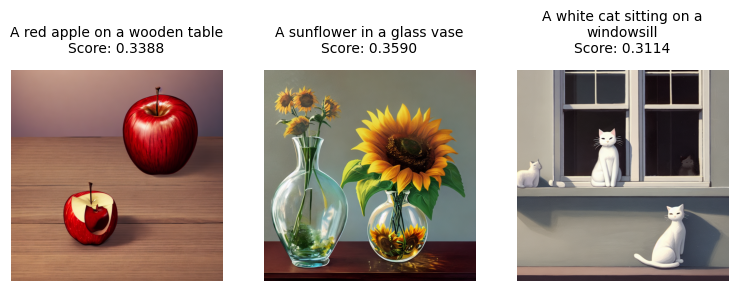

In [15]:

import matplotlib.pyplot as plt
import textwrap

fig, axes = plt.subplots(1, len(prompts), figsize=(8, 5))

for i, (image, score) in enumerate(zip(images, clip_scores)):
    axes[i].imshow(image)
    axes[i].axis("off")
    
    wrapped_text = "\n".join(textwrap.wrap(prompts[i], width=30))  
    axes[i].set_title(f"{wrapped_text}\nScore: {score:.4f}", fontsize=10, pad=12)  

plt.tight_layout(pad=3)  
plt.show()